<a href="https://colab.research.google.com/github/nouha18/pythoncheckpoint/blob/update/Summer_shopping_VirtualNetwork_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summer Shopping in E-commerce Plateform
**Context ▶**
Studying top products requires more than just product listings. You also need to know what sells well and what does not


⚛ The first question that cames in mind when loading dataset is which model we're going to use for this data analysis or for preparing our algorithm for the machine implementation ?
to answer this question you can have a look at the Ml_cheat_sheet description below 📑
[scikit learn cheat sheet](https://scikit-learn.org/stable/_static/ml_map.png)

In [279]:
import pandas as pand
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install pywaffle --quiet
from pywaffle import Waffle
from wordcloud import WordCloud

In [280]:
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio
import csv

tts = gTTS("Preprocessing phase")
tts.save('row.wav')
sound_file = 'row.wav'
Audio(sound_file, autoplay=True)




In [281]:
dataset = pand.read_csv('./drive/MyDrive/data-shop.csv')
dataset.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


**Defining categorical&numerical columns**

**cat_col** = ['title','title_orig','tags']
              
**num_col** = ['price',	'retail_price',	'currency_buyer',	'units_sold',	'uses_ad_boosts',	'rating',	'rating_count',	'rating_five_count',	'rating_four_count',	'rating_three_count',	'rating_two_count','rating_one_count'	'badges_count','badge_local_product',,	'badge_product_quality'	,'badge_fast_shipping']

In [282]:
dataset.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,95.735602,0.105531,0.018436,0.074380,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,214.075544,0.340709,0.134565,0.262472,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,20.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,94.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,2789.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [283]:
dataset.info

<bound method DataFrame.info of                                                   title  ... crawl_month
0     2020 Summer Vintage Flamingo Print  Pajamas Se...  ...     2020-08
1     SSHOUSE Summer Casual Sleeveless Soirée Party ...  ...     2020-08
2     2020 Nouvelle Arrivée Femmes Printemps et Été ...  ...     2020-08
3     Hot Summer Cool T-shirt pour les femmes Mode T...  ...     2020-08
4     Femmes Shorts d'été à lacets taille élastique ...  ...     2020-08
...                                                 ...  ...         ...
1568  Nouvelle Mode Femmes Bohême Pissenlit Imprimer...  ...     2020-08
1569  10 couleurs femmes shorts d'été lacent ceintur...  ...     2020-08
1570  Nouveautés Hommes Siwmwear Beach-Shorts Hommes...  ...     2020-08
1571  Mode femmes d'été sans manches robes col en V ...  ...     2020-08
1572  Pantalon de yoga pour femmes à la mode Slim Fi...  ...     2020-08

[1573 rows x 43 columns]>

In [284]:
dataset.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


In [285]:
dataset.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

Now we've detected that there's a lot of missing data, the next step should be the preprocessing data.

In [286]:
def plot_missing_data(df):
    columns_with_null = df.columns[df.isna().sum() > 0]
    null_pct = (df[columns_with_null].isna().sum() / df.shape[0]).sort_values(ascending=False) * 100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Nan values in dataframe by columns');

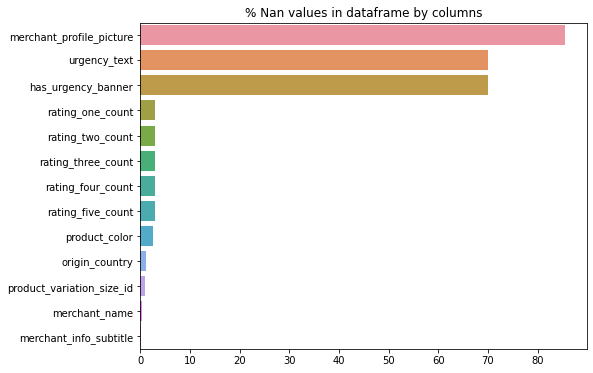

In [287]:
plot_missing_data(dataset)

In [288]:
dataset['has_urgency_banner'] = dataset['has_urgency_banner'].replace(np.nan,0)
dataset['urgency_text']=dataset['urgency_text'].replace({'Quantité limitée !':'QuantityLimited',
                                               'Réduction sur les achats en gros':'WholesaleDiscount',
                                               np.nan:'noText'})
rating_columns = ['rating_one_count','rating_two_count','rating_three_count','rating_four_count','rating_five_count']
dataset[rating_columns] = dataset[rating_columns].fillna(value=-1)
dataset.loc[dataset['rating_five_count']==-1,'rating_count'].value_counts()
dataset[rating_columns]=dataset[rating_columns].replace(-1,0)
nan_cat_cols = ['origin_country','product_color','product_variation_size_id','merchant_name','merchant_info_subtitle']
dataset[nan_cat_cols] = dataset[nan_cat_cols].replace(np.nan,'Unknown')
dataset.columns[dataset.isna().sum()>0]
dataset= dataset.drop_duplicates()
print("Duplicate product_id :",dataset['product_id'].duplicated().sum())


Duplicate product_id : 198


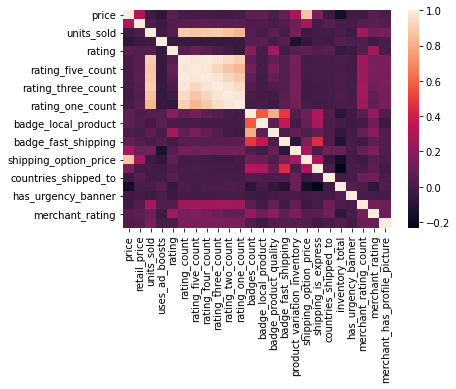

In [289]:
sns.heatmap(dataset.corr(), annot = False)
plt.show()

<Figure size 864x432 with 0 Axes>

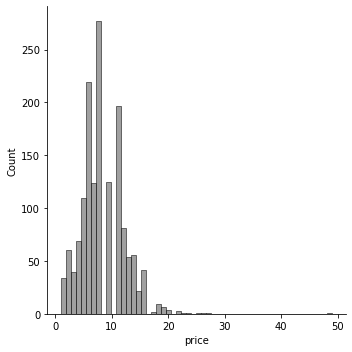

In [290]:
plt.figure(figsize=(12,6))
sns.displot(dataset['price'], color='grey', label='Price',kde=False)

In [291]:
def priceDescription():
  print(dataset['price'].max())
  print(dataset['price'].min())
  print(dataset['price'].mean())
priceDescription()

49.0
1.0
8.356452241715388


**Note: **
I notice that the maximum of price density is around  8.36 average and up to 250 product sold with that price.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



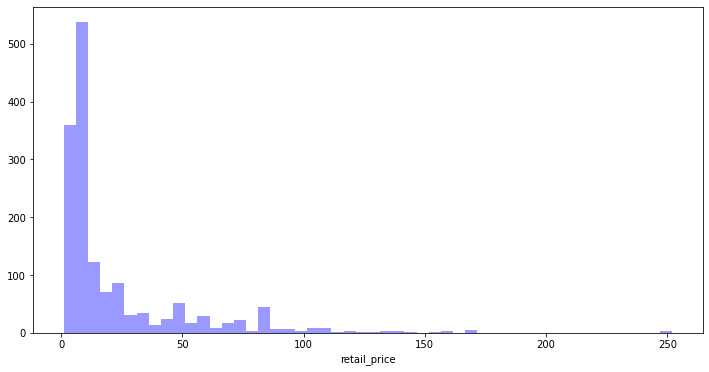

In [292]:
##right skewed distribution
plt.figure(figsize=(12,6))
sns.distplot(dataset['retail_price'], color='blue', label='Retail price',kde=False)

In [293]:
def retailPrice_description():
  print(dataset['retail_price'].max())
  print(dataset['retail_price'].min())
  print(dataset['retail_price'].mean())
retailPrice_description()  

252
1
23.317089018843404


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



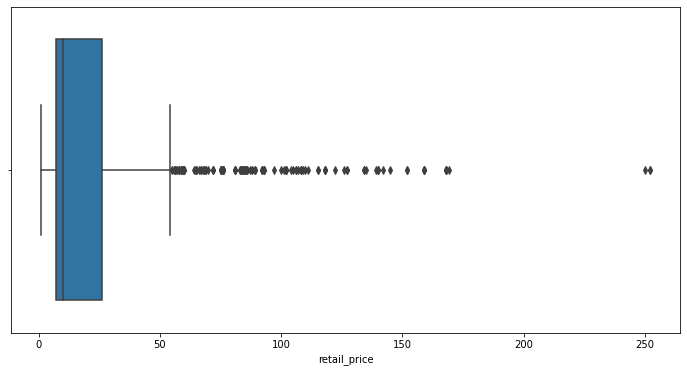

In [294]:
plt.figure(figsize=(12,6))
sns.boxplot(dataset["retail_price"])

In [ ]:
"""
print("Elimination of outliers for price ")
##########################

Q1 = np.percentile(dataset['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dataset['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

 
# Upper bound
upper = np.where(dataset['price'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dataset['price'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
dataset.drop(upper[0], inplace = True)
dataset.drop(lower[0], inplace = True)
 
print("New Shape: ", dataset.shape)

"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



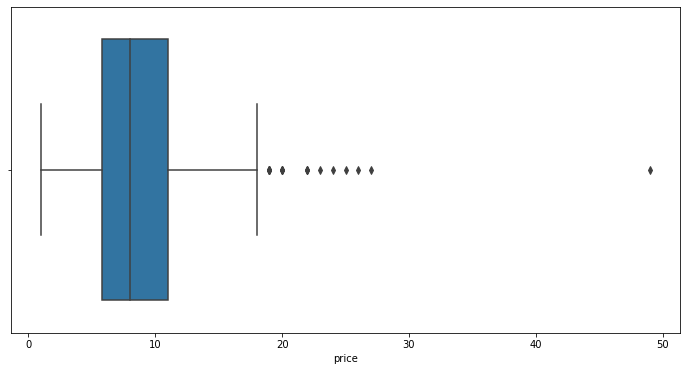

In [295]:
plt.figure(figsize=(12,6))
sns.boxplot(dataset["price"])

In [296]:
country_price=dataset[['units_sold','origin_country']]
country_mean_price=country_price.groupby('origin_country')['units_sold'].mean().reset_index()
country_mean_price.rename(columns={'units_sold': 'units_sold_mean'},inplace=True)
to_codes={'CN':'CHN',
         'GB':'GBR',
         'SG':'SGP',
         'US':'USA',
         'VE':'VEN'}
country_mean_price['code']=country_mean_price['origin_country'].map(to_codes)
country_mean_price

,origin_country,units_sold_mean,code
0,AT,100.000000,NaN
1,CN,4469.229784,CHN
2,GB,1000.000000,GBR
3,SG,10050.000000,SGP
4,US,1405.161290,USA
5,Unknown,6800.000000,NaN
6,VE,75.000000,VEN


In [297]:
color_sale=dataset.groupby('product_color')['units_sold'].sum()
color_sale=color_sale.reset_index().sort_values(by='units_sold',ascending=False)
color_sale
top_10_color_sale=color_sale.head(10)
fig=px.bar(data_frame=top_10_color_sale,
      x='product_color',
      y='units_sold')
fig.update_layout(title='Top 10 color sales')
fig.show()

In [298]:
px.scatter(dataset, x='units_sold', y='price',marginal_x='box', title='Price vs Units Sold')

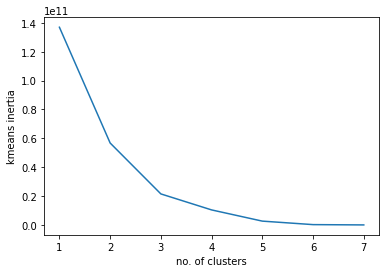

In [299]:
from sklearn.cluster import KMeans

clusters = {}
for i in range(1,8):
    kmeans = KMeans(n_clusters=i).fit(dataset[['units_sold']])
    clusters[i] = kmeans.inertia_
    
plt.plot(list(clusters.keys()), list(clusters.values()));
plt.xlabel('no. of clusters');
plt.ylabel('kmeans inertia');

In [300]:
#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = dataset.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pand.merge(dataset,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [301]:
dataset['units_sold_cluster'] = KMeans(n_clusters=3).fit(dataset[['units_sold']]).predict(dataset[['units_sold']])
dataset.groupby(['units_sold_cluster'])['units_sold'].describe()
px.scatter(dataset,x='units_sold',y='rating', color='units_sold_cluster', marginal_y ='box',title='Rating vs units sold')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [302]:
px.scatter(dataset,x='units_sold',y='rating', color='units_sold_cluster', marginal_y ='box',title='Rating vs units sold')

In [303]:
px.scatter(dataset,x='retail_price', y='price',color='units_sold_cluster',marginal_y='box')

In [304]:
px.scatter(dataset, x='price', y='shipping_option_price', color= 'units_sold_cluster', title='Shipping price vs Price')

In [305]:
dataset.groupby(['uses_ad_boosts'])['units_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
uses_ad_boosts,,,,,,,,
0,868.0,4590.008065,9592.714940,1.0,100.0,1000.0,5000.0,100000.0
1,671.0,4205.767511,9237.372452,10.0,100.0,1000.0,5000.0,100000.0


In [306]:
rating_cols=['rating_count','rating_five_count','rating_four_count',
             'rating_three_count','rating_two_count','rating_one_count']
ratings_data=dataset[rating_cols+['uses_ad_boosts']]

ratings_data.groupby('uses_ad_boosts').describe()
fig = go.Figure()
for col in rating_cols:
    fig.add_trace(go.Box(x=ratings_data['uses_ad_boosts'],
                         y=ratings_data[col],
                         name=col,
                         boxmean=True,
                         boxpoints=False))
##fig.update_traces(quartilemethod="exclusive")
fig.update_layout(boxmode='group',
                  title='Relations between ad boosts and rating',
                  xaxis = dict(
                  tickvals = [0,1],
                  ticktext = ['Without add boosts','With add boosts']))
fig.show()

In [307]:
def make_clusters(df,column):
    clusters = {}
    for i in range(1,8):
        kmeans = KMeans(n_clusters=i).fit(df[[column]])
        clusters[i] = kmeans.inertia_

    plt.plot(list(clusters.keys()), list(clusters.values()));
    plt.title(f'{column} clusters')
    plt.xlabel('no. of clusters');
    plt.ylabel('kmeans inertia'); 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fu

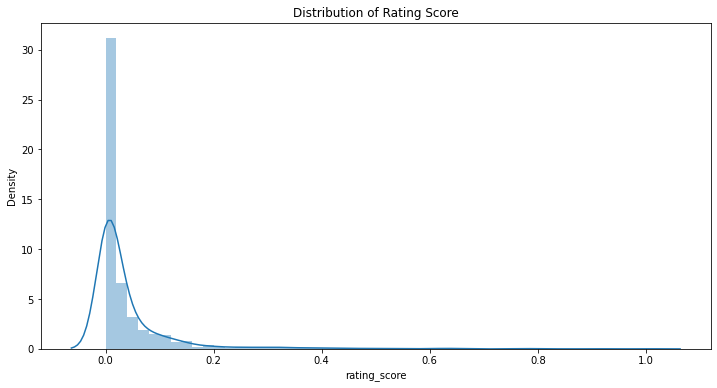

In [308]:
dataset['rating_score'] = dataset['rating']*dataset['rating_count']
dataset['rating_score'] =dataset['rating_score']/dataset['rating_score'].max()
plt.figure(figsize=(12,6))
sns.distplot(dataset['rating_score']);
plt.title('Distribution of Rating Score');


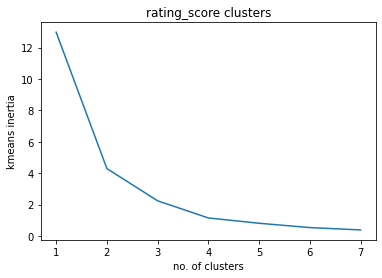

In [309]:
make_clusters(dataset,'rating_score')

In [310]:
kmeans = KMeans(n_clusters=3).fit(dataset[['rating_score']])
dataset['rating_score_cluster'] = kmeans.predict(dataset[['rating_score']])
##dataset= order_cluster(dataset,cluster_field_name='rating_score_cluster',target_field_name='rating_score',ascending=True)
dataset.groupby('rating_score_cluster')[['rating','rating_count','units_sold']].describe().T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



rating_score_cluster             0              1             2
rating       count     1317.000000      36.000000    186.000000
             mean         3.803956       3.896389      3.942312
             std          0.535916       0.219430      0.283822
             min          1.000000       3.350000      2.930000
             25%          3.500000       3.760000      3.725000
             50%          3.820000       3.925000      3.960000
             75%          4.100000       4.035000      4.160000
             max          5.000000       4.410000      4.480000
rating_count count     1317.000000      36.000000    186.000000
             mean       312.331055   11015.888889   3164.161290
             std        424.751869    3714.035062   1375.821192
             min          0.000000    6860.000000   1594.000000
             25%         20.000000    8350.000000   2153.000000
             50%         96.000000    9333.500000   2717.500000
             75%        505.000000   12959.500000   3671.250000
             max       2191.000000   20744.000000   7596.000000
units_sold   count     1317.000000      36.000000    186.000000
             mean      1861.197418   45000.000000  14704.301075
             std       3022.326147   28535.691936   6939.404351
             min          1.000000   20000.000000   5000.000000
             25%        100.000000   20000.000000  10000.000000
             50%       1000.000000   50000.000000  10000.000000
             75%       1000.000000   50000.000000  20000.000000
             max      20000.000000  100000.000000  50000.000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: Settin

overall_score_cluster            0              1
rating_score count     1228.000000     311.000000
             mean         0.011039       0.161409
             std          0.015452       0.151098
             min          0.000000       0.017939
             25%          0.000729       0.075479
             50%          0.003055       0.110720
             75%          0.015681       0.183270
             max          0.075795       1.000000
price        count     1228.000000     311.000000
             mean         8.341311       8.416238
             std          4.086449       3.287194
             min          1.000000       1.770000
             25%          5.770000       6.000000
             50%          8.000000       8.000000
             75%         11.000000      11.000000
             max         49.000000      22.000000
units_sold   count     1228.000000     311.000000
             mean      1214.329805   17090.032154
             std       1753.399258   15100.894985
             min          1.000000    5000.000000
             25%        100.000000   10000.000000
             50%        100.000000   10000.000000
             75%       1000.000000   20000.000000
             max       5000.000000  100000.000000

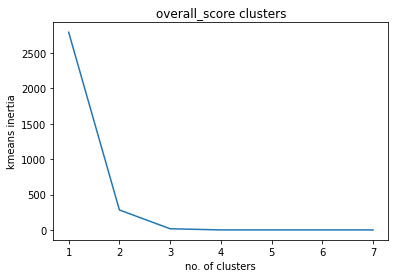

In [311]:
dataset['overall_score'] = dataset['rating_score_cluster'] + dataset['units_sold_cluster']
make_clusters(dataset,'overall_score');
kmeans= KMeans(n_clusters=2).fit(dataset[['overall_score']])
dataset['overall_score_cluster'] = kmeans.predict(dataset[['overall_score']])
##dataset = order_cluster(dataset=dataset,target_field_name='overall_score', cluster_field_name='overall_score_cluster', ascending=True)
dataset.groupby('overall_score_cluster')[['rating_score','price','units_sold']].describe().T

In [312]:
badges_column = ['badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping']

In [313]:
dataset[dataset['badges_count'] != 0][badges_column]
def is_successful(units_sold):
    if units_sold > 1000:
        return 1
    else:
        return 0

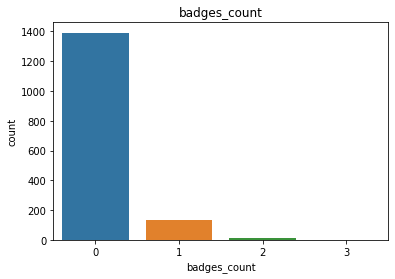

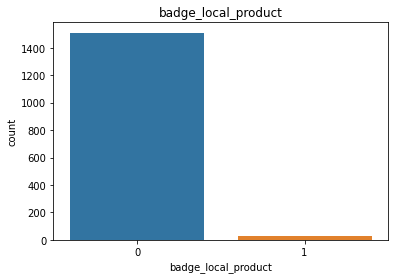

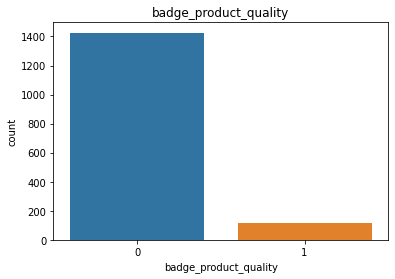

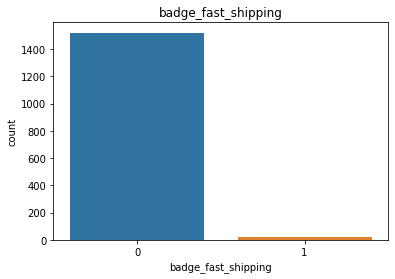

In [314]:
for column in badges_column:
    sns.countplot(data=dataset, x=column)
    plt.title(column)
    plt.show()

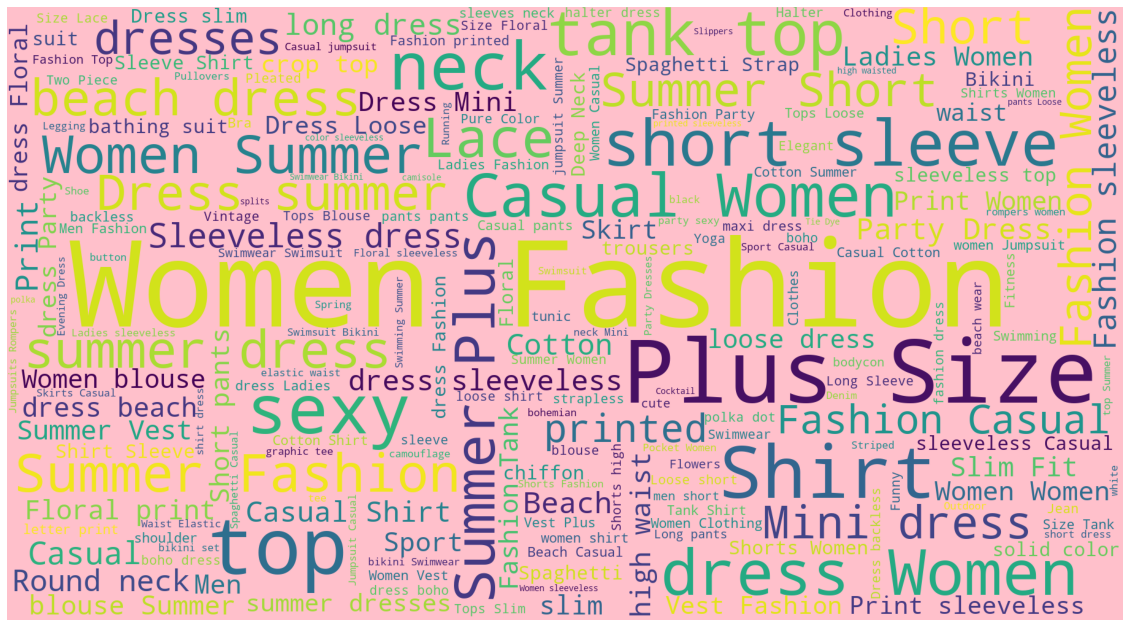

In [315]:
plt.subplots(figsize=(20,35))
wordcloud = WordCloud(
                          background_color='pink',
                          width=1820,
                          height=1000
                         ).generate(" ".join(dataset.tags))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('bazard.png')
plt.show()

**Scikit Learn Cheat sheet** interesting papers 
[Papers](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/09/Python-Cheat-Sheet-for-Scikit-learn-Edureka.pdf)
